In [1]:
!pip install matplotlib

In [8]:
import requests as req
import os, json, re
import matplotlib.pyplot as plt

In [9]:
folderPath = f'./nidss'
if not os.path.exists(folderPath):
    os.makedirs(folderPath)

600
600


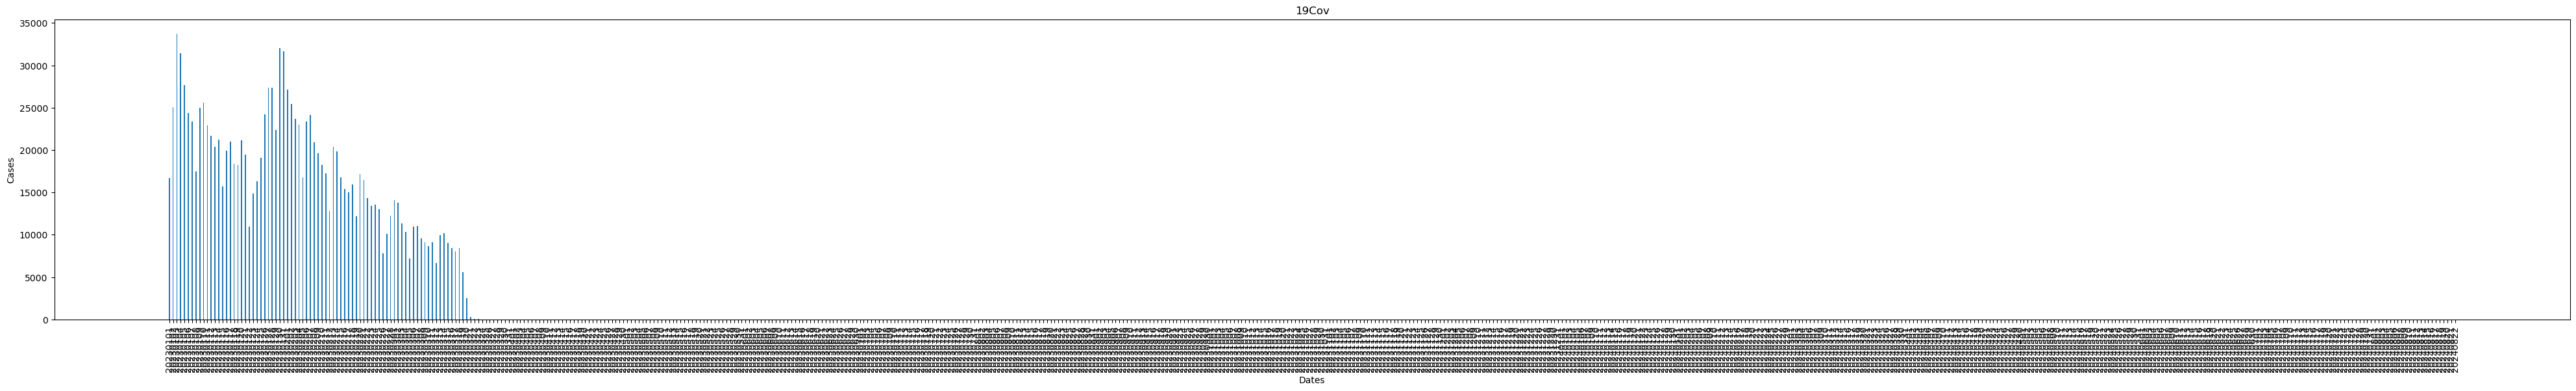

In [16]:
url = "https://nidss.cdc.gov.tw/nndss/disease?id=19Cov"
res = req.get(url=url)

str_json = ""

regex = r"hcJson\.push\((.+)\)"
match = re.search(regex, res.text)
if match != None:
    str_json = match[1]

with open(f"{folderPath}/nidss.json", "w", encoding="utf-8") as file:
    file.write(str_json)

dict_json = json.loads(str_json)

list_dates = dict_json['xAxis_categories']

list_cases = dict_json['series'][0]['data']

print(len(list_dates))
print(len(list_cases))

plt.figure(figsize=(50,6))
plt.bar(list_dates, list_cases, 0.3)
plt.title('19Cov')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()